## Introduction
**Problem** : Churn model for public transports

**Approach** :
1.   Identify high churning profiles by comapring the 2 periods. Use Kmeans Algorithm to segment churning and non churning profiles. Identify the most impacted counties and find the profiles to be targeted in these counties
2.   For the counties identified in previous step, find the routes with high demand to be targeted for churn

Thus, we whave the routes and the profiles to be targeted for Churn



## Development

# Preprocessing Data

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np

In [ ]:
# Import User Profile data
user_profile =  pd.read_csv(r'D:\Personal\WDL\Stage 1\Churn Prediction\user_profile.csv',encoding= 'unicode_escape')

In [ ]:
len(user_profile)

544

In [ ]:
user_profile.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092


In [ ]:
user_profile.Period.value_counts()

Sep-20 to Jan-21    289
Sep-19 to Feb-20    255
Name: Period, dtype: int64

In [ ]:
user_profile.columns

Index(['Region_of_Origin', 'District_of_Origin', 'County_of_Origin', 'Period',
       'GenderDescription', 'AgeClassDescription', 'Average_BusUsers_per_Day'],
      dtype='object')

In [ ]:
# Creation of data for processing/modeling - Master Data
# Taking unique columns - Region_of_Origin', 'District_of_Origin', 'County_of_Origin', 'GenderDescription', 'AgeClassDescription',
data_v0 = user_profile[['Region_of_Origin', 'District_of_Origin', 'County_of_Origin','GenderDescription', 'AgeClassDescription',]].drop_duplicates()

In [ ]:
len(data_v0)

305

In [ ]:
data_v0.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription
0,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24
1,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34
2,R1 - AM Lisboa,Lisboa,Amadora,Female,35-44
3,R1 - AM Lisboa,Lisboa,Amadora,Female,45-54
4,R1 - AM Lisboa,Lisboa,Amadora,Female,55-64


In [ ]:
# Generating unique keys
data_v0['key'] = data_v0['Region_of_Origin']+data_v0['District_of_Origin'] + data_v0['County_of_Origin'] + data_v0['GenderDescription'] + data_v0['AgeClassDescription']
user_profile['key'] = user_profile['Region_of_Origin']+user_profile['District_of_Origin'] + user_profile['County_of_Origin'] + user_profile['GenderDescription'] + user_profile['AgeClassDescription']

In [ ]:
# Creating dataframes for each period
user_profile_period_1 = user_profile[user_profile['Period'] == 'Sep-19 to Feb-20']
user_profile_period_2 = user_profile[user_profile['Period'] == 'Sep-20 to Jan-21']

In [ ]:
# Appending period 1 Master data
data_v1 = pd.merge(data_v0, user_profile_period_1[['key', 'Average_BusUsers_per_Day']], how = 'left', on = 'key')

In [ ]:
data_v1.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription,key,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24,R1 - AM LisboaLisboaAmadoraFemale15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34,R1 - AM LisboaLisboaAmadoraFemale25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Female,35-44,R1 - AM LisboaLisboaAmadoraFemale35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Female,45-54,R1 - AM LisboaLisboaAmadoraFemale45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Female,55-64,R1 - AM LisboaLisboaAmadoraFemale55-64,1216.148092


In [ ]:
len(data_v1)

305

In [ ]:
# Renaming Period 1 Average User Count Column
data_v1.rename(columns = {'Average_BusUsers_per_Day':'Period_1_Avg_Users'}, inplace = True)

In [ ]:
# Appending Period 2 data to Master Data
data_v2 = pd.merge(data_v1, user_profile_period_2[['key', 'Average_BusUsers_per_Day']], how = 'left', on = 'key')

In [ ]:
data_v2.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription,key,Period_1_Avg_Users,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24,R1 - AM LisboaLisboaAmadoraFemale15-24,294.194206,536.005174
1,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34,R1 - AM LisboaLisboaAmadoraFemale25-34,1081.652817,408.068335
2,R1 - AM Lisboa,Lisboa,Amadora,Female,35-44,R1 - AM LisboaLisboaAmadoraFemale35-44,235.836653,478.337192
3,R1 - AM Lisboa,Lisboa,Amadora,Female,45-54,R1 - AM LisboaLisboaAmadoraFemale45-54,840.951323,571.192813
4,R1 - AM Lisboa,Lisboa,Amadora,Female,55-64,R1 - AM LisboaLisboaAmadoraFemale55-64,1216.148092,741.072367


In [ ]:
len(data_v2)

305

In [ ]:
# Renaming Period 2 Average User Count Column

data_v2.rename(columns = {'Average_BusUsers_per_Day':'Period_2_Avg_Users'}, inplace = True)

In [ ]:
data_v2['Period_1_Avg_Users'].isnull().sum()

50

In [ ]:
# Replacing nulls with 0 in Master Data
data_v2['Period_1_Avg_Users'].replace(np.NaN,0,inplace = True)
data_v2['Period_2_Avg_Users'].replace(np.NaN,0,inplace = True)
# data_v2['Period_1_Avg_Users'].replace(None,0)

In [ ]:
# Calculating Churn Counts
data_v2['Churn_Count'] = data_v2['Period_2_Avg_Users'] - data_v2['Period_1_Avg_Users']

In [ ]:
# Calculating Churn Percentage
data_v2['Churn_Percentage'] = (data_v2['Churn_Count']/data_v2['Period_1_Avg_Users'])*100
data_v2.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription,key,Period_1_Avg_Users,Period_2_Avg_Users,Churn_Count,Churn_Percentage
0,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24,R1 - AM LisboaLisboaAmadoraFemale15-24,294.194206,536.005174,241.810968,82.194334
1,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34,R1 - AM LisboaLisboaAmadoraFemale25-34,1081.652817,408.068335,-673.584482,-62.273631
2,R1 - AM Lisboa,Lisboa,Amadora,Female,35-44,R1 - AM LisboaLisboaAmadoraFemale35-44,235.836653,478.337192,242.500539,102.825636
3,R1 - AM Lisboa,Lisboa,Amadora,Female,45-54,R1 - AM LisboaLisboaAmadoraFemale45-54,840.951323,571.192813,-269.758510,-32.077779
4,R1 - AM Lisboa,Lisboa,Amadora,Female,55-64,R1 - AM LisboaLisboaAmadoraFemale55-64,1216.148092,741.072367,-475.075725,-39.063970


In [ ]:
# Handling Divide by 0 error
data_v2['Churn_Percentage'].replace(np.inf,100, inplace = True)

In [ ]:
# Final Master Data
data = data_v2

In [ ]:
data.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,GenderDescription,AgeClassDescription,key,Period_1_Avg_Users,Period_2_Avg_Users,Churn_Count,Churn_Percentage
0,R1 - AM Lisboa,Lisboa,Amadora,Female,15-24,R1 - AM LisboaLisboaAmadoraFemale15-24,294.194206,536.005174,241.810968,82.194334
1,R1 - AM Lisboa,Lisboa,Amadora,Female,25-34,R1 - AM LisboaLisboaAmadoraFemale25-34,1081.652817,408.068335,-673.584482,-62.273631
2,R1 - AM Lisboa,Lisboa,Amadora,Female,35-44,R1 - AM LisboaLisboaAmadoraFemale35-44,235.836653,478.337192,242.500539,102.825636
3,R1 - AM Lisboa,Lisboa,Amadora,Female,45-54,R1 - AM LisboaLisboaAmadoraFemale45-54,840.951323,571.192813,-269.758510,-32.077779
4,R1 - AM Lisboa,Lisboa,Amadora,Female,55-64,R1 - AM LisboaLisboaAmadoraFemale55-64,1216.148092,741.072367,-475.075725,-39.063970


In [ ]:
len(data)

305

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
# Descriptive statistics of target column
data['Churn_Percentage'].describe()

count     305.000000
mean       38.893128
std       341.549135
min      -100.000000
25%       -54.757672
50%       -27.818961
75%        80.695298
max      4227.424965
Name: Churn_Percentage, dtype: float64

In [ ]:
# Interquartile Range Calculation
sort_data = np.sort(data['Churn_Percentage'])
Q1 = np.percentile(sort_data, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sort_data, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sort_data, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  -54.757671762906526
Q1 50 percentile of the given data is,  -27.818960920619862
Q1 75 percentile of the given data is,  80.69529808039631
Interquartile range is 135.45296984330284


In [ ]:
# Outlier Limit Calculation
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -257.93712652786076
up_limit is 283.87475284535054


In [ ]:
# Outlier Removal
data = data[(data['Churn_Percentage']>low_lim) &(data['Churn_Percentage']<up_lim)]

In [ ]:
len(data)

295

In [ ]:
# Descriptive statistics of the target data after outlier removal
data['Churn_Percentage'].describe()

count    295.000000
mean      -7.444830
std       71.326655
min     -100.000000
25%      -55.658153
50%      -30.734565
75%       28.555900
max      276.093521
Name: Churn_Percentage, dtype: float64

# Identify Optimum Cluster Count

In [ ]:
# Reshaping data for training
data_target = np.array(data['Churn_Percentage'])
data_target = data_target.reshape(-1,1)

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py

Text(0, 0.5, 'Inertia')

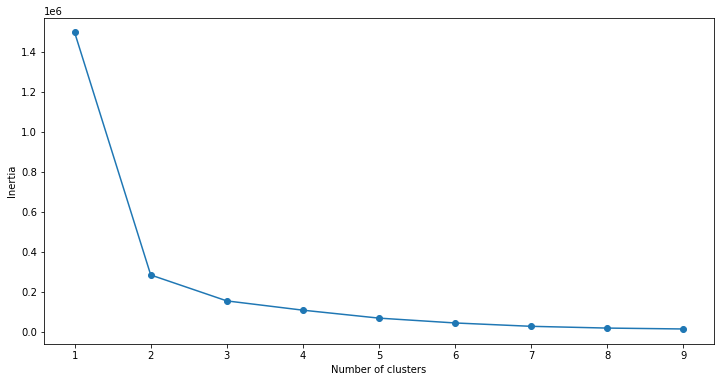

In [ ]:
# Elbow curve - to identify optimum number of clusters
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_target)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
from sklearn.metrics import silhouette_score

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py

Text(0, 0.5, 'Silhouette Score')

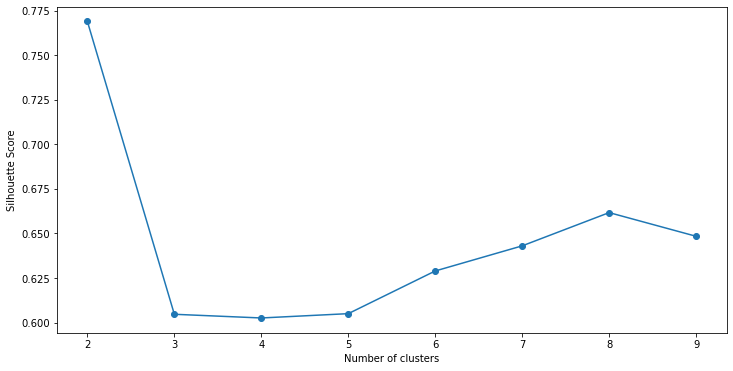

In [ ]:
# Silhouette Score Curve
ss = []
for cluster in range(2,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_target)
    score = silhouette_score(data_target, kmeans.labels_, metric='euclidean')
    ss.append(score)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,10), 'Silhouette Score':ss})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Silhouette Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

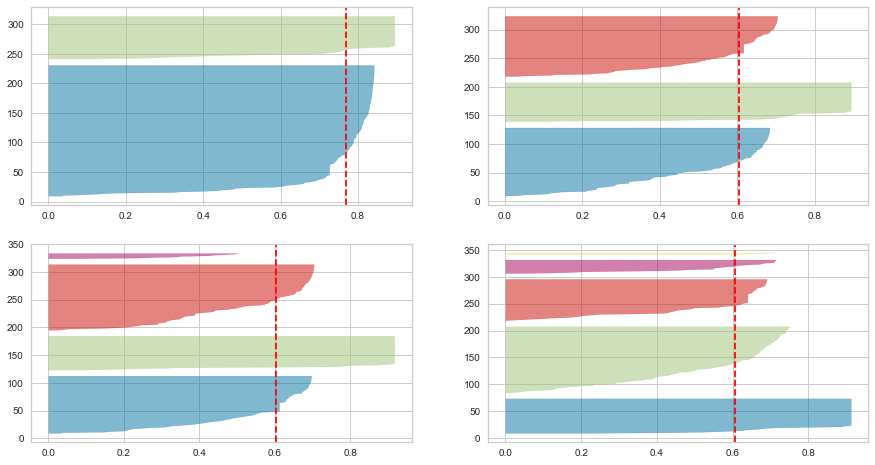

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_target)

# K means Model

In [ ]:
# Training k-means model
kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(data_target)
pred = kmeans.predict(data_target)

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [ ]:

score = silhouette_score(data_target, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.2f' % score)

Silhouetter Score: 0.77


In [ ]:
# Appending Cluster
data['cluster'] = pred
data['cluster'].value_counts()

<ipython-input-45-029b9c930eb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = pred


0    222
1     73
Name: cluster, dtype: int64

# Analyzing Clusters for Characteristics

In [ ]:
# Cluster Centroids
kmeans.cluster_centers_ 

array([[-44.20039938],
       [104.3323802 ]])

In [ ]:
print("Churning Segment - Negative Churn Percentage Counts : " + str(len(data[(data['cluster'] == 0) & (data['Churn_Percentage'] < 0)])))
print("Churning Segment - Positive Churn Percentage Counts : " + str(len(data[(data['cluster'] == 0) & (data['Churn_Percentage'] > 0)])))
print("Non-Churning Segment - Negative Churn Percentage Counts : " + str(len(data[(data['cluster'] == 1) & (data['Churn_Percentage'] < 0)])))
print("Non-Churning Segment - Positive Churn Percentage Counts : " + str(len(data[(data['cluster'] == 1) & (data['Churn_Percentage'] > 0)])))

Churning Segment - Negative Churn Percentage Counts : 207
Churning Segment - Positive Churn Percentage Counts : 15
Non-Churning Segment - Negative Churn Percentage Counts : 0
Non-Churning Segment - Positive Churn Percentage Counts : 73


# Cluster 0 - Churning Segment
# Cluster 1 - Non Churning Segments
# Based on Cluster Centers and Churn Percentage Numbers

In [ ]:
# Identify Counties with Maximum Churn
cluster_0_county = pd.DataFrame(data[data['cluster'] == 0].groupby('County_of_Origin')['Churn_Count'].sum()/sum(data[data['cluster'] == 0]['Churn_Count']))
cluster_0_county.sort_values('Churn_Count', ascending = False)

,Churn_Count
County_of_Origin,
Gondomar,0.219361
Maia,0.179469
Porto,0.133156
Lisboa,0.055113
Matosinhos,0.045215
Vila Nova de Gaia,0.041034
Oeiras,0.039501
Odivelas,0.035764
Cascais,0.035581


In [ ]:
# Identify Countites with non Churning Profiles
cluster_1_county = pd.DataFrame(data[data['cluster'] == 1].groupby('County_of_Origin')['Churn_Count'].sum()/sum(data[data['cluster'] == 1]['Churn_Count']))
cluster_1_county.sort_values('Churn_Count', ascending = False)

,Churn_Count
County_of_Origin,
Matosinhos,0.171019
Maia,0.131421
Oeiras,0.099201
Vale de Cambra,0.091223
Valongo,0.080338
Vila Nova de Gaia,0.065894
Almada,0.053801
Odivelas,0.042902
Moita,0.033145


In [ ]:
# Check for churning numbers
cluster_0_county_ct = pd.DataFrame(data[data['cluster'] == 0].groupby('County_of_Origin')['Churn_Count'].sum())
cluster_0_county_ct.sort_values('Churn_Count', ascending = True)

,Churn_Count
County_of_Origin,
Gondomar,-40283.999681
Maia,-32958.037010
Porto,-24452.996249
Lisboa,-10121.016388
Matosinhos,-8303.328315
Vila Nova de Gaia,-7535.570405
Oeiras,-7254.018175
Odivelas,-6567.851360
Cascais,-6534.158047


In [ ]:
# Check for Non Churning Numbers
cluster_1_county_ct = pd.DataFrame(data[data['cluster'] == 1].groupby('County_of_Origin')['Churn_Count'].sum())
cluster_1_county_ct.sort_values('Churn_Count', ascending = False)

,Churn_Count
County_of_Origin,
Matosinhos,4631.218411
Maia,3558.910945
Oeiras,2686.389570
Vale de Cambra,2470.332342
Valongo,2175.563770
Vila Nova de Gaia,1784.418737
Almada,1456.931342
Odivelas,1161.784715
Moita,897.584965


In [ ]:
# Read the OD Matrix
od_data = pd.read_csv(r'D:\Personal\WDL\Stage 1\Churn Prediction\od_matrix.csv',encoding= 'unicode_escape')

In [ ]:
# Taking counties with High Churning numbers
od_data_counties = od_data[od_data['County_of_Origin'].isin(['Gondomar','Maia','Porto'])]

In [ ]:
od_data_counties.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
1460,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,PORTO,131203,0.295123
1461,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,GONDOMAR,130408,0.191129
1462,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,PORTO,131217,0.172608
1463,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,PORTO,131210,0.073846
1464,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,PORTO,131202,0.065012


In [ ]:
# Identify Churning Profile for Gondomar
data[(data['cluster'] == 0) & (data['County_of_Origin'] == 'Gondomar' )].groupby(['GenderDescription','AgeClassDescription'])['Churn_Count'].sum()/sum(data[(data['cluster'] == 0) & (data['County_of_Origin'] == 'Gondomar' )]['Churn_Count'])

GenderDescription  AgeClassDescription
Female             15-24                 -0.001541
                   25-34                  0.003061
                   35-44                  0.010408
                   45-54                  0.004257
                   65+                    0.806171
Male               25-34                  0.006830
                   35-44                  0.004425
                   45-54                  0.023745
                   55-64                  0.032371
                   65+                    0.110273
Name: Churn_Count, dtype: float64

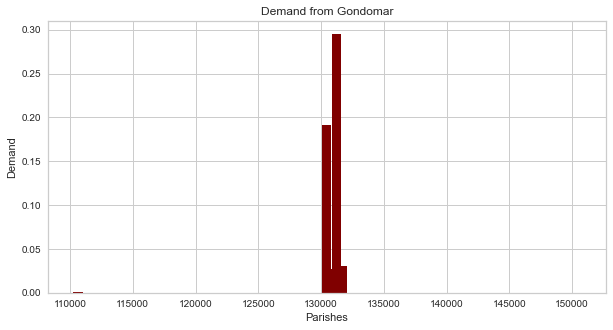

In [ ]:
# Identify Routes with High Demand in Gondomar
gondomar_parish = list(od_data_counties[od_data_counties['County_of_Origin'] == 'Gondomar']['Dicofre_ParishCode_of_Public_Transportation'])
gondomar_demand = list(od_data_counties[od_data_counties['County_of_Origin'] == 'Gondomar']['Demand_weight'])
fig = plt.figure(figsize = (10, 5))
plt.bar(gondomar_parish, gondomar_demand, color ='maroon', width = 700)
plt.xlabel("Parishes")
plt.ylabel("Demand")
plt.title("Demand from Gondomar")
plt.show()

In [ ]:
# Target Routes for Gondomar
od_data_counties[(od_data_counties['County_of_Origin'] == 'Gondomar')& (od_data_counties['Demand_weight'] > 0.15)]

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
1460,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,PORTO,131203,0.295123
1461,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,GONDOMAR,130408,0.191129
1462,R2 - AM Porto,Porto,Gondomar,R2 - AM Porto,PORTO,PORTO,131217,0.172608


# Recommendation 1: 
# Target the above Gondomar routes for user Profile :65+ Females

In [ ]:
# Identify Churning Profile for Maia
data[(data['cluster'] == 0) & (data['County_of_Origin'] == 'Maia' )].groupby(['GenderDescription','AgeClassDescription'])['Churn_Count'].sum()/sum(data[(data['cluster'] == 0) & (data['County_of_Origin'] == 'Maia' )]['Churn_Count'])

GenderDescription  AgeClassDescription
Female             15-24                  0.000554
                   25-34                  0.045072
                   35-44                  0.003174
Male               15-24                  0.010539
                   35-44                  0.003910
                   45-54                  0.015740
                   55-64                  0.006676
                   65+                    0.914335
Name: Churn_Count, dtype: float64

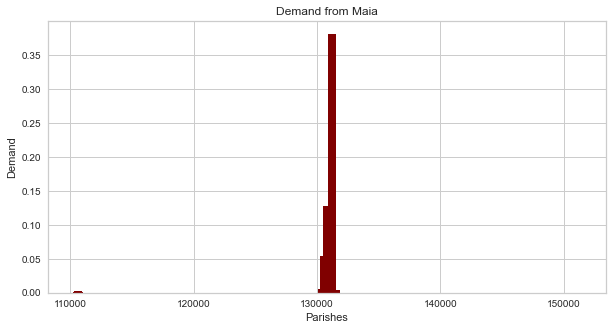

In [ ]:
# Identify Routes with High Demand in Maia
maia_parish = list(od_data_counties[od_data_counties['County_of_Origin'] == 'Maia']['Dicofre_ParishCode_of_Public_Transportation'])
maia_demand = list(od_data_counties[od_data_counties['County_of_Origin'] == 'Maia']['Demand_weight'])
fig = plt.figure(figsize = (10, 5))
plt.bar(maia_parish, maia_demand, color ='maroon', width = 700)
plt.xlabel("Parishes")
plt.ylabel("Demand")
plt.title("Demand from Maia")
plt.show()

In [ ]:
# Target Routes for Maia
od_data_counties[(od_data_counties['County_of_Origin'] == 'Maia')& (od_data_counties['Demand_weight'] > 0.10)]

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
1548,R2 - AM Porto,Porto,Maia,R2 - AM Porto,PORTO,PORTO,131217,0.380782
1549,R2 - AM Porto,Porto,Maia,R2 - AM Porto,PORTO,PORTO,131210,0.159660
1550,R2 - AM Porto,Porto,Maia,R2 - AM Porto,PORTO,MATOSINHOS,130811,0.128280


# Recommendation 2: 
# Target the above Maia routes for user Profile :65+ Males

In [ ]:
# Identify Churning Profile for Porto
data[(data['cluster'] == 0) & (data['County_of_Origin'] == 'Porto' )].groupby(['GenderDescription','AgeClassDescription'])['Churn_Count'].sum()/sum(data[(data['cluster'] == 0) & (data['County_of_Origin'] == 'Porto' )]['Churn_Count'])

GenderDescription  AgeClassDescription
Female             25-34                  0.023417
                   35-44                  0.009666
                   45-54                  0.109246
                   55-64                  0.185060
                   65+                    0.159795
Male               15-24                  0.001143
                   25-34                  0.122213
                   35-44                  0.023227
                   45-54                  0.072464
                   55-64                  0.025131
                   65+                    0.268637
Name: Churn_Count, dtype: float64

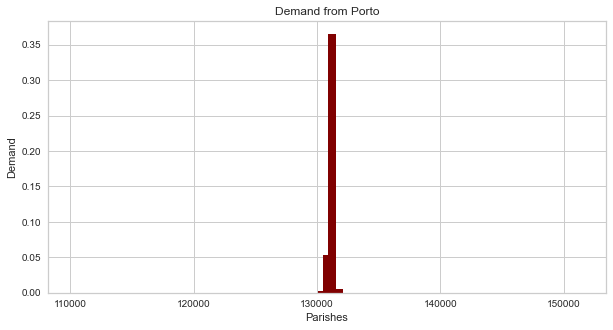

In [ ]:
# Identify Routes with High Demand in Porto
porto_parish = list(od_data_counties[od_data_counties['County_of_Origin'] == 'Porto']['Dicofre_ParishCode_of_Public_Transportation'])
porto_demand = list(od_data_counties[od_data_counties['County_of_Origin'] == 'Porto']['Demand_weight'])
fig = plt.figure(figsize = (10, 5))
plt.bar(porto_parish, porto_demand, color ='maroon', width = 700)
plt.xlabel("Parishes")
plt.ylabel("Demand")
plt.title("Demand from Porto")
plt.show()

In [ ]:
# Target Routes for Porto
od_data_counties[(od_data_counties['County_of_Origin'] == 'Maia')& (od_data_counties['Demand_weight'] > 0.10)]

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
1548,R2 - AM Porto,Porto,Maia,R2 - AM Porto,PORTO,PORTO,131217,0.380782
1549,R2 - AM Porto,Porto,Maia,R2 - AM Porto,PORTO,PORTO,131210,0.159660
1550,R2 - AM Porto,Porto,Maia,R2 - AM Porto,PORTO,MATOSINHOS,130811,0.128280


# Recommendation 3: 
# Target the above Porto routes for user Profile :65+ Males and 55+ Females

## Conclusions



1. Mostly, senior citizens appear to be churning. As pandemic data is not included (assumption), we are ruling out the possibility of churn due to COVID-19
2. However, there appears to be slight increase in the usage (based on cluster 1 metrics) for other and young age groups. One of the reasons of churn might be overcrowding and less space to sit. So offers can include reservations and more seating spaces for Senior Citizens
3. Any external data was not taken into consideration. But the solution is scalable to any level of data. The solution focused on counties to identify target routes.
4. The current solution give clear idea on the senior citizen churn rates and routes. In conclusion, we would like to say that our solution can be scaled to any geographic level and understand the churn profiles across any route.






## Future Work



1. If the OD demand data is available at gender and age level as well, a more specific solution can be created
2. Distance as factor, can also be taken into consideration to see public transport impact on short and long routes

